In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import string
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

In [4]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anjali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
warnings.filterwarnings('ignore')

In [10]:
class TEDTalkRecommender:
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        self.data = None
        self.vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
        self.tfidf_matrix = None

    def load_and_preprocess_data(self):
        # Load dataset
        self.data = pd.read_csv(self.dataset_path)
        self.data.dropna(subset=['title', 'details'], inplace=True)
        
        # Combine title and details
        self.data['details'] = self.data['title'] + ' ' + self.data['details']
        
        # Clean text data
        self.data['details'] = self.data['details'].apply(self._clean_text)
        
        # Vectorize details using TF-IDF
        self.tfidf_matrix = self.vectorizer.fit_transform(self.data['details'])
    
    def _clean_text(self, text):
        # Remove stopwords and punctuation
        stop_words = set(stopwords.words('english'))
        text = ''.join([char for char in text if char not in string.punctuation])
        words = text.lower().split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)

    def recommend(self, user_input, top_n=5):
        # Vectorize user input
        user_tfidf = self.vectorizer.transform([user_input])
        
        # Compute cosine similarity
        similarity_scores = cosine_similarity(user_tfidf, self.tfidf_matrix).flatten()
        
        # Get top N recommendations
        top_indices = similarity_scores.argsort()[-top_n:][::-1]
        recommendations = self.data.iloc[top_indices][['main_speaker', 'title', 'details']]
        return recommendations

    def visualize_wordcloud(self):
        # Combine all details for visualization
        combined_text = ' '.join(self.data['details'])
        wordcloud = WordCloud(width=800, height=400, max_words=1000, background_color='white').generate(combined_text)
        plt.figure(figsize=(15, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of TED Talk Topics', fontsize=20)
        plt.show()

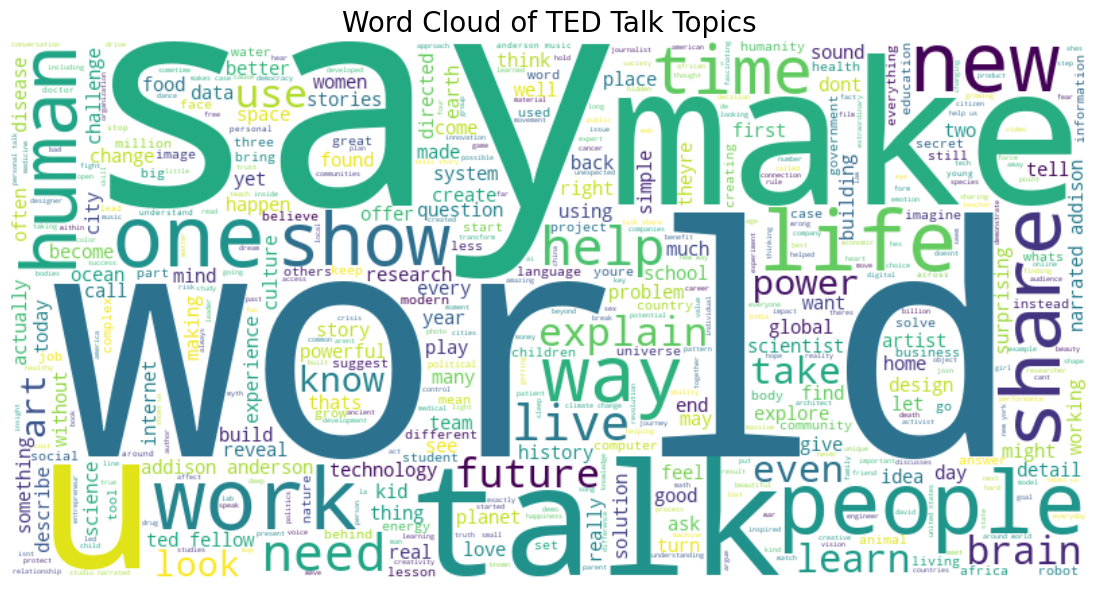

Top TED Talk Recommendations:

           main_speaker                                              title  \
1758    Laura Vanderkam              How to gain control of your free time   
3975    Alain de Botton            A kinder, gentler philosophy of success   
66            Fang Ruan  Management lessons from Chinese business and p...   
2591  Elizabeth Gilbert    Success, failure and the drive to keep creating   
3495         Matt Cutts                      Try something new for 30 days   

                                                details  
1758  gain control free time 168 hours week find tim...  
3975  kinder gentler philosophy success alain de bot...  
66    management lessons chinese business philosophy...  
2591  success failure drive keep creating elizabeth ...  
3495  try something new 30 days something youve alwa...  


In [12]:
# Example Usage
if __name__ == "__main__":
    # Initialize the recommender system
    recommender = TEDTalkRecommender(dataset_path='tedx_dataset.csv')
    recommender.load_and_preprocess_data()
    
    # Visualize the dataset
    recommender.visualize_wordcloud()
    
    # Get recommendations based on user input
    user_input = "Time Management and achieving success"
    recommendations = recommender.recommend(user_input)
    
    print("Top TED Talk Recommendations:\n")
    print(recommendations)

In [15]:
user_input = 'Climate change and impact on the health. How can we change this world by reducing carbon footprints?'
recommendations = recommender.recommend(user_input)
    
print("Top TED Talk Recommendations:\n")
print(recommendations)

Top TED Talk Recommendations:

              main_speaker                                              title  \
582    Sarvesh Subramanian  An app that predicts the impact of global clim...   
3302          James Hansen          Why I must speak out about climate change   
377             Britt Wray      How climate change affects your mental health   
2586         Gavin Schmidt            The emergent patterns of climate change   
370   Asmeret Asefaw Berhe  A climate change solution that's right under o...   

                                                details  
582   app predicts impact global climate change deep...  
3302  must speak climate change top climate scientis...  
377   climate change affects mental health thats eve...  
2586  emergent patterns climate change cant understa...  
370   climate change solution thats right feet there...  
